USING TENSORFLOW

In [25]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

LOADING THE MNSIT DATASET

In [26]:
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

# Split the data into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Filter the data to include only the digits 0 and 1
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

# Print the shapes of the filtered datasets
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training data shape: (12665, 28, 28)
Training labels shape: (12665,)
Testing data shape: (2115, 28, 28)
Testing labels shape: (2115,)


In [27]:
print ('The first element of x_train is: ', x_train[0])

The first element of x_train is:  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        

In [28]:
print(y_train[0])
print(y_train[-1])

0
1


VISUALISING THE DATA

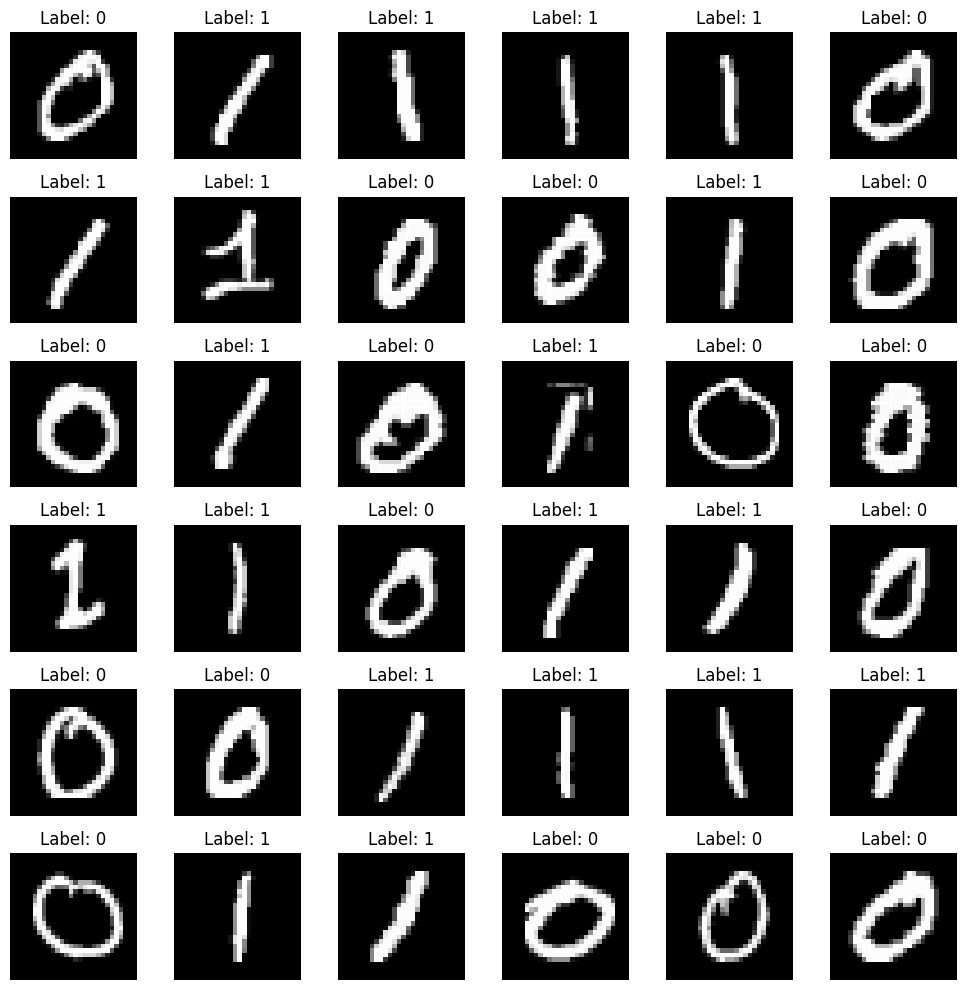

In [29]:
def plot_images(images, labels, rows=4, cols=4):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(min(len(images), rows * cols)):  # Limit to the number of available images
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Example: Plotting a subset of the filtered training images
plot_images(x_train[:36], y_train[:36], rows=6, cols=6)  # Adjust rows and cols as needed


MODEL REPRESENTATION

In [30]:
# Flatten the images from 28x28 to 784
x_train_flattened = x_train.reshape(-1, 784)
x_test_flattened = x_test.reshape(-1, 784)

In [31]:
# Define the Sequential model
model = tf.keras.Sequential([
        tf.keras.layers.Dense(25, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(15, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])

# Train the model
model.fit(x_train_flattened, y_train, epochs=10, batch_size=32, validation_data=(x_test_flattened, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test_flattened, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9758 - loss: 0.3245 - val_accuracy: 0.9995 - val_loss: 0.0380
Epoch 2/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - accuracy: 0.9978 - loss: 0.0335 - val_accuracy: 0.9995 - val_loss: 0.0146
Epoch 3/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9998 - loss: 0.0132 - val_accuracy: 0.9995 - val_loss: 0.0088
Epoch 4/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 720us/step - accuracy: 0.9996 - loss: 0.0082 - val_accuracy: 0.9995 - val_loss: 0.0062
Epoch 5/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.9994 - loss: 0.0062 - val_accuracy: 0.9995 - val_loss: 0.0050
Epoch 6/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9995 - loss: 0.0050 - val_accuracy: 0.9995 - val_loss: 0.0047
Epoch 7/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.9999 - loss: 0.0027 - val_accuracy: 0.9995 - val_loss: 0.0038
Epoch 8/10
396/396 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.9996 - loss: 0.0029 - va

In [32]:
prediction = model.predict(x_test[0].reshape(1,784))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(x_test[500].reshape(1,784))  # a one
print(f" predicting a one:  {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
 predicting a zero: [[0.9991204]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
 predicting a one:  [[0.00068776]]


Probability Interpretation:

The values 0.9991204 and 0.00068776 are probabilities outputted by the model's sigmoid activation function.
For prediction a zero, a value close to 1 indicates high confidence that the input image is classified as 0.
For prediction a one, a value close to 0 indicates high confidence that the input image is classified as 1.

Comparing true vs prediction labels

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


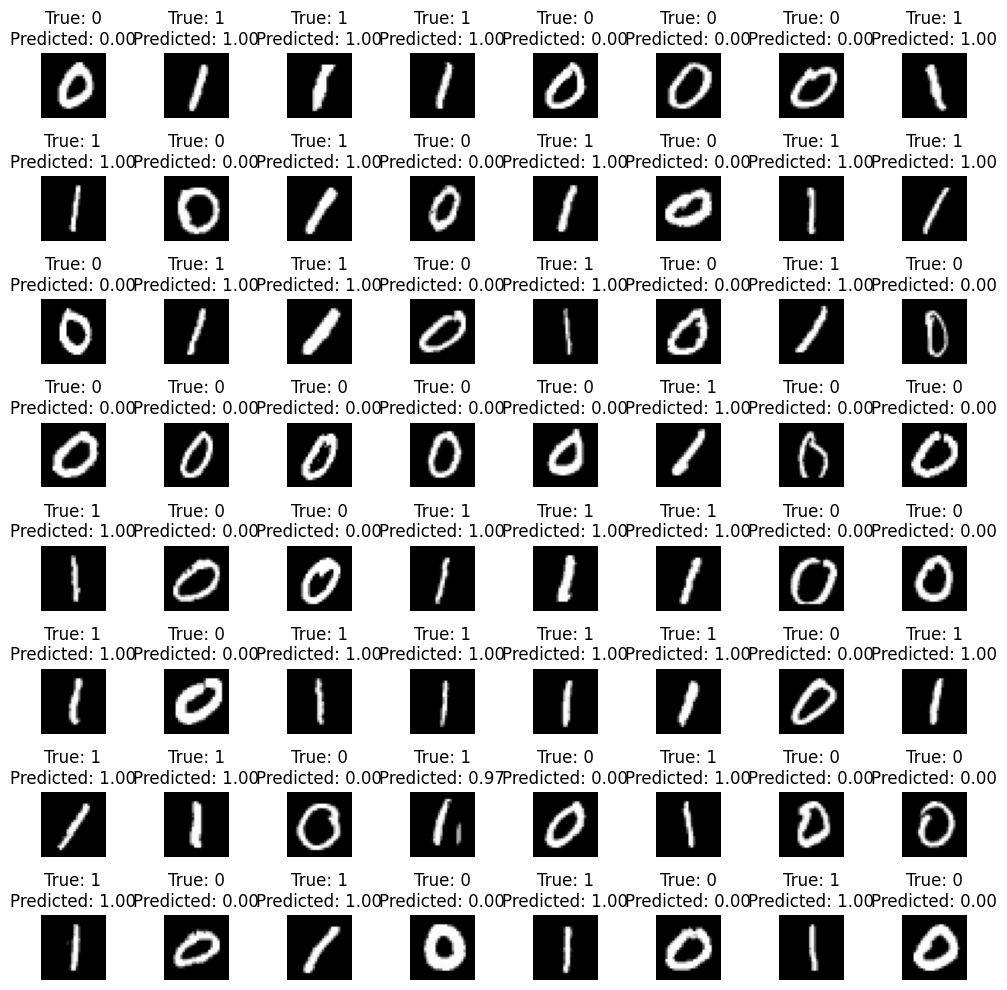

In [33]:
# Function to plot comparison
def plot_comparison(images, true_labels, predicted_labels, rows=8, cols=8):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    axes = axes.flatten()
    for i in range(rows * cols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i][0]:.2f}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Select random sample indices
np.random.seed(42)  # For reproducibility
sample_indices = np.random.choice(len(x_test), 64, replace=False)

# Make predictions for the selected sample
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]
predictions = model.predict(sample_images.reshape(-1, 784))

# Plot the comparison
plot_comparison(sample_images, sample_labels, predictions)

USING NUMPY TO CREATE DENSE AND SEQUENTIAL

In [34]:
#We take take values of weights and bias from the above model
W1_tmp, b1_tmp = model.layers[0].get_weights()
W2_tmp, b2_tmp = model.layers[1].get_weights()
W3_tmp, b3_tmp = model.layers[2].get_weights()

In [35]:
print(f"W1 shape: {W1_tmp.shape}, b1 shape: {b1_tmp.shape}")
print(f"W1: {W1_tmp}")
print(f"b1: {b1_tmp}")

W1 shape: (784, 25), b1 shape: (25,)
W1: [[ 0.04844627  0.0397509   0.03921115 ... -0.03080441 -0.06230276
   0.02382458]
 [-0.06688655  0.0804024   0.08017969 ... -0.07192463 -0.042449
   0.05417073]
 [-0.06231136 -0.07990622 -0.02113714 ...  0.00763319 -0.03675047
   0.02041356]
 ...
 [ 0.03751373 -0.0497787   0.07680564 ... -0.02859464 -0.04431423
  -0.04184013]
 [-0.07798434 -0.07276108 -0.01956616 ... -0.05893755  0.01574609
  -0.02414271]
 [-0.05395706 -0.00831621  0.06439368 ...  0.02648914  0.06097381
   0.08429055]]
b1: [ 0.21953389 -0.25768802  0.2376791   0.20219302 -0.21546917  0.21715824
  0.22421846  0.20667621 -0.2335583   0.23187666  0.20548427  0.20220487
 -0.24426126  0.22073366  0.21314889  0.18934481 -0.19808699 -0.23614876
 -0.22554104 -0.2086674   0.20769118 -0.18421715 -0.22347775  0.22735362
  0.20001976]


In [36]:
def sigmoid(x):
    return 1./(1.+np.exp(-x))

def my_dense(a_in, W, b, g):
    units = W.shape[1]
    a_out = np.zeros(units)
    for i in range(units):
        w = W[:,i]
        z = np.dot(w, a_in) + b[i]
        a_out[i] = g(z)
    return(a_out)

def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)


In [45]:
prediction = my_sequential(x_test_flattened[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    y_predicted = 1
else:
    yhat = 0
print( "y_predicted = ", y_predicted, " label= ", y_test[0])
prediction = my_sequential(x_test_flattened[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "y_predicted = ", y_predicted, " label= ", y_test[500])

y_predicted =  1  label=  1
y_predicted =  1  label=  0


COMPARING TENSORFLOW AND NUMPY PREDICTIONS

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


C:\Users\Asus\AppData\Local\Temp\ipykernel_18944\384070685.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  my_yhat = int(my_prediction >= 0.5)
C:\Users\Asus\AppData\Local\Temp\ipykernel_18944\384070685.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tf_yhat = int(tf_prediction >= 0.5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━

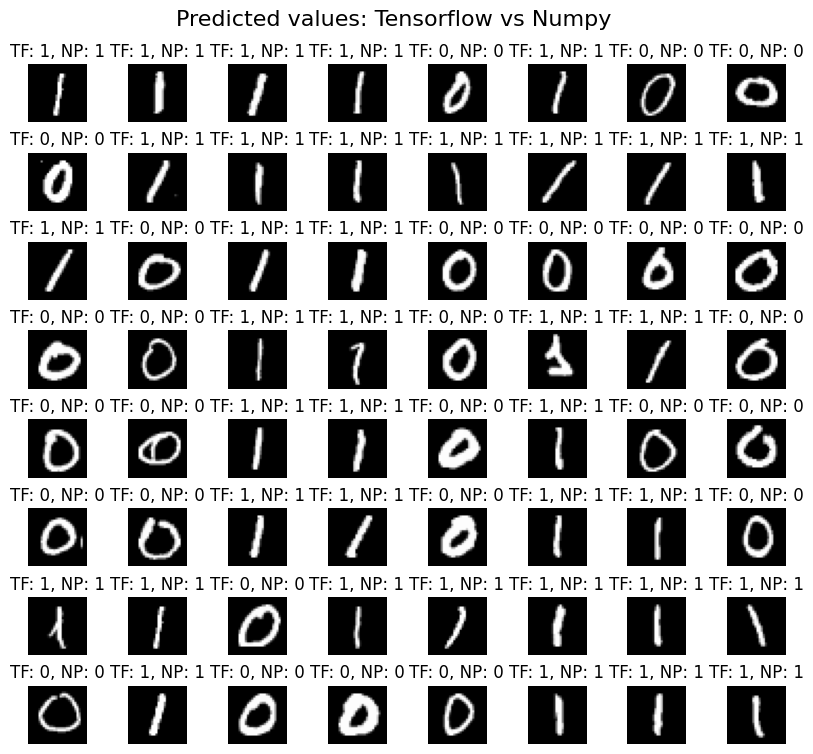

In [47]:
m, n = x_test_flattened.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])  # [left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Reshape the flattened image back to (28, 28)
    image = x_test_flattened[random_index].reshape(28, 28)
    
    # Display the image
    ax.imshow(image, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(x_test_flattened[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp)
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(x_test_flattened[random_index].reshape(1, 784))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the predicted values
    ax.set_title(f"TF: {tf_yhat}, NP: {my_yhat}")
    ax.axis('off') 

fig.suptitle("Predicted values: Tensorflow vs Numpy", fontsize=16)
plt.show()
